Import all the Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import joblib
import warnings


Step 1: Importing and Understanding the Dataset

In [2]:
#Import Train Data
df = pd.read_csv('../data/train.csv')


In [3]:
#Import Test Data
df_test = pd.read_csv('../data/test.csv')

In [4]:
# --- Step 1: Understanding the Dataset ---
print("Training Dataset Shape:", df.shape)
print("Test Dataset Shape:", df_test.shape)
display(df.head())
display(df_test.head())

Training Dataset Shape: (1460, 81)
Test Dataset Shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check for missing values in both datasets
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    missing_percentage = (missing_values / len(df)) * 100
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

display(missing_values_table(df))
display(missing_values_table(df_test))


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


,Missing Values,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageQual,78,5.346127
GarageCond,78,5.346127
GarageYrBlt,78,5.346127


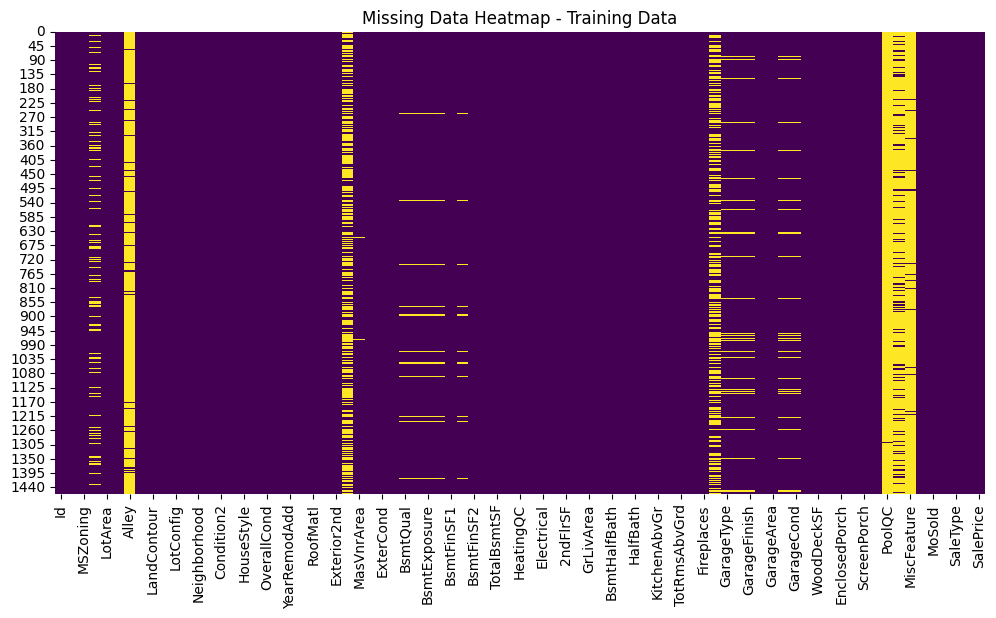

In [7]:
# Visualize missing data patterns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap - Training Data")
plt.show()

Step 2 : Data Preprocessing

In [8]:
# Drop columns with too many missing values
drop_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(columns=drop_columns, inplace=True)
df_test.drop(columns=drop_columns, inplace=True)

In [9]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')  # Exclude target variable
cat_cols = df.select_dtypes(include=['object']).columns

In [10]:
# Impute missing values
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])
df_test[num_cols] = imputer_num.transform(df_test[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
df_test[cat_cols] = imputer_cat.transform(df_test[cat_cols])

In [11]:
# Encode categorical variables
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    df_test[col] = encoder.transform(df_test[col])


In [12]:
# Feature engineering: Create 'TotalSF'
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

df.drop(columns=['Id'], inplace=True)
test_ids = df_test['Id'].astype(int)
df_test.drop(columns=['Id'], inplace=True)

In [13]:
# Data Validation (Check for NaN after imputation)
print("NaN values after imputation (Training):", df.isnull().sum().sum())
print("NaN values after imputation (Test):", df_test.isnull().sum().sum())


NaN values after imputation (Training): 0
NaN values after imputation (Test): 0


Step 3: Model Selection

In [14]:
# --- Step 3: Model Selection ---
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


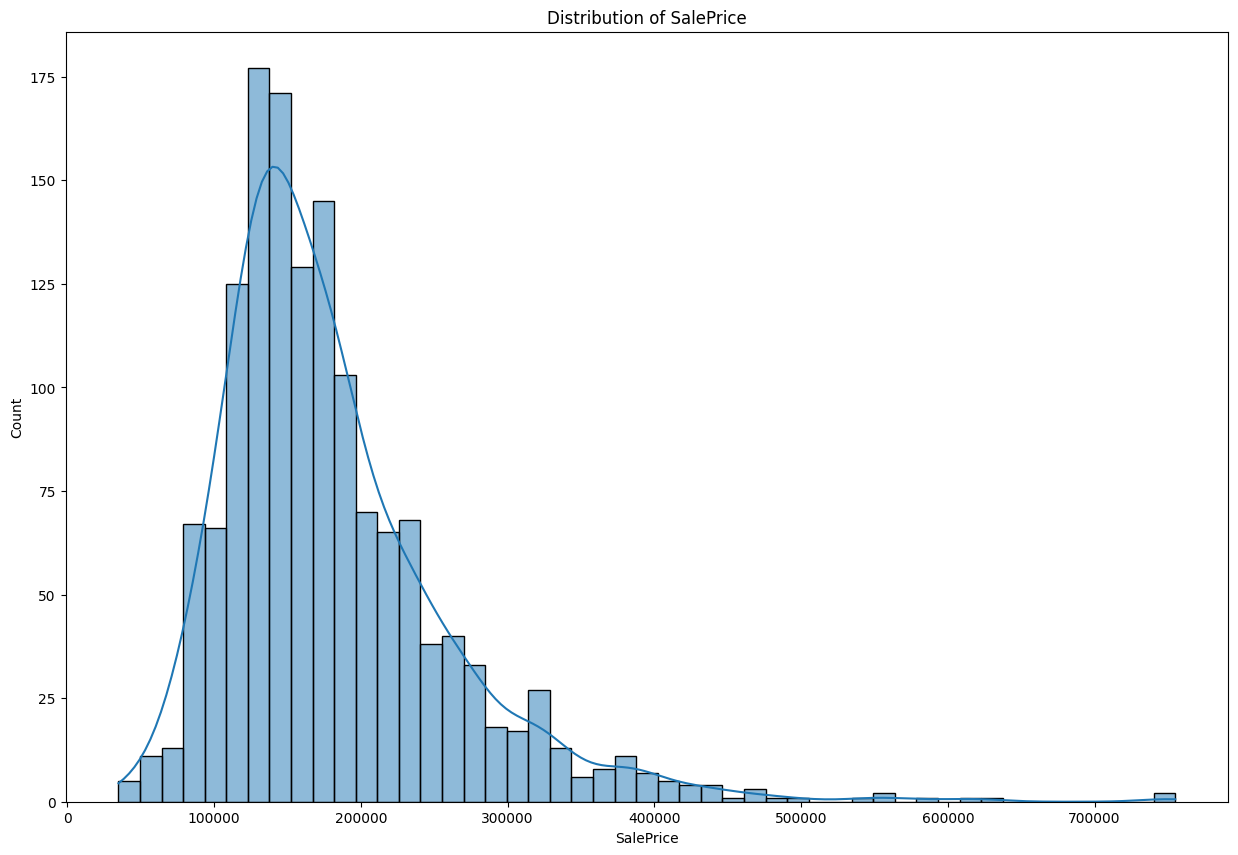

In [15]:
# Feature Distributions
plt.figure(figsize=(15, 10))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

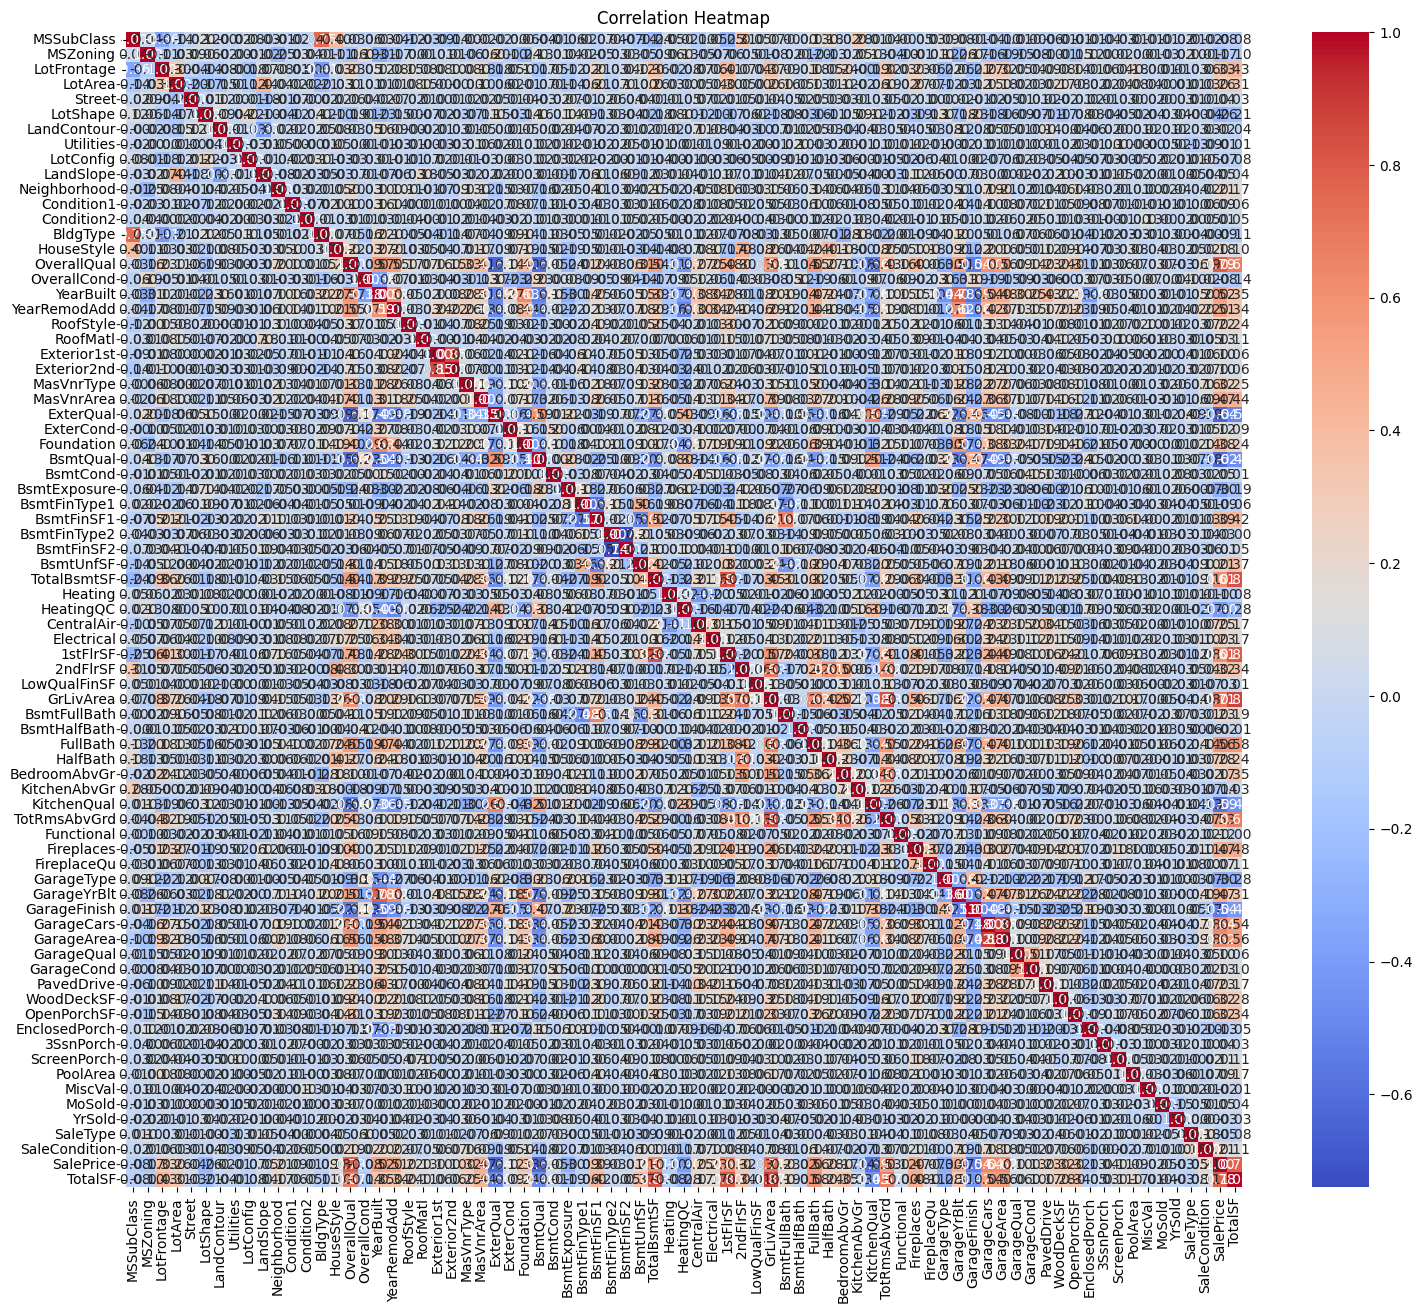

In [16]:
# Correlation Heatmap with Annotations
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

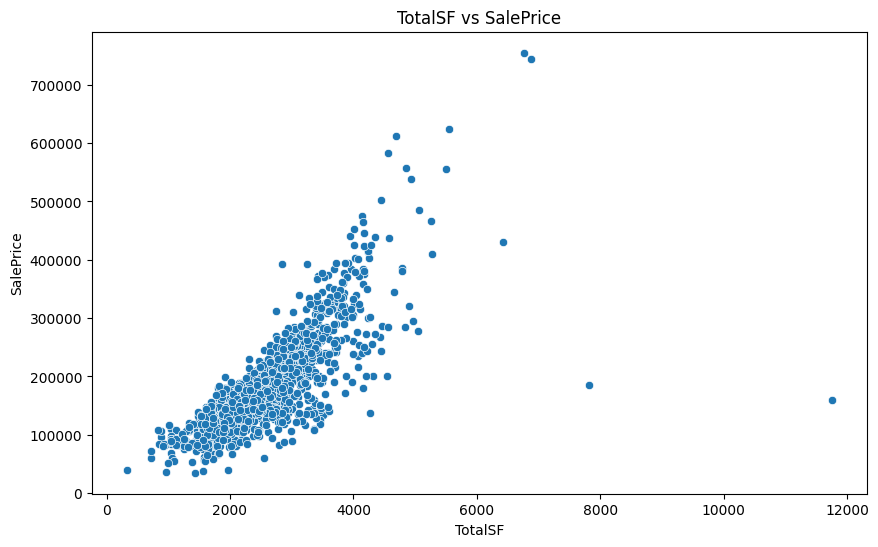

In [17]:
# Scatter plot of 'TotalSF' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=df)
plt.title('TotalSF vs SalePrice')
plt.show()

Step 4 : Model Training and Evaluation

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse}")


Linear Regression RMSE: 34286.97340276366
Random Forest RMSE: 29523.129148945656
Gradient Boosting RMSE: 27661.2663987888


In [19]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


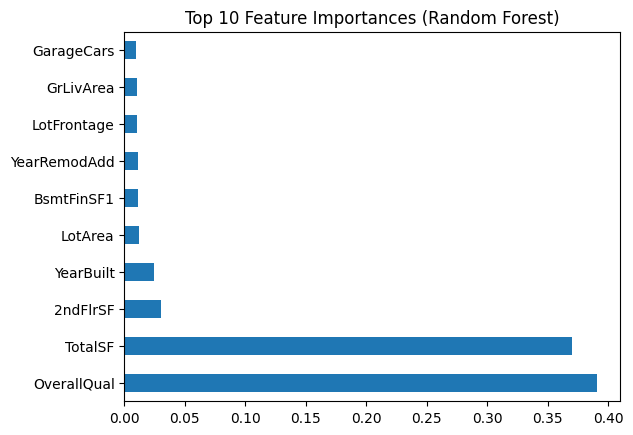

In [20]:
# --- Feature Importance (Random Forest) ---
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

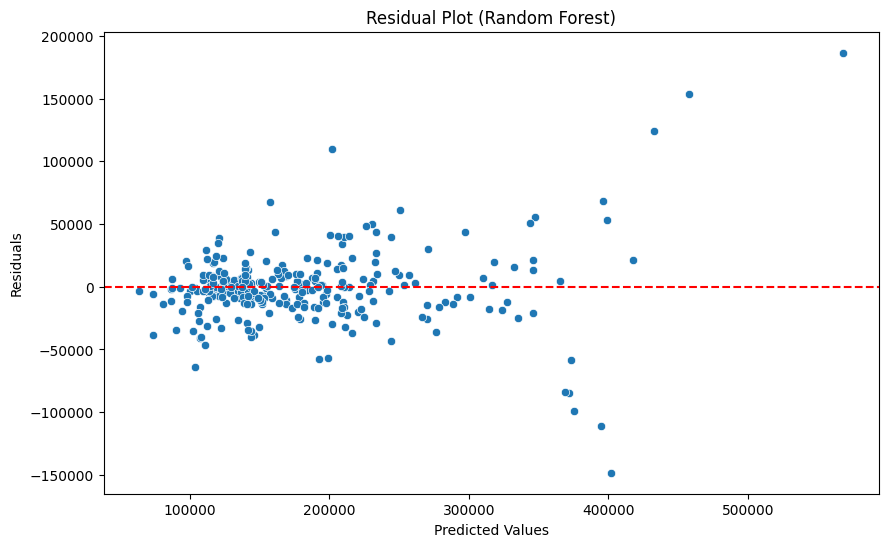

In [21]:
# --- Error Analysis (Residual Plots) ---
y_pred_best = best_rf.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Step 4: Prediction & Submission

In [22]:
# --- Step 4: Prediction & Submission ---
best_model = grid_search.best_estimator_
best_model.fit(X, y)

RandomForestRegressor(min_samples_split=5, random_state=42)

In [23]:
y_pred_final = best_model.predict(df_test)
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': y_pred_final})
submission.to_csv('../submissions/finalsubmission.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


Step 5 :Model Saving and Loading

In [24]:
# Save the best model
joblib.dump(best_model, '../models/house_price_model.pkl')
print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl


In [25]:
# Load the saved model for testing
data = joblib.load("../models/house_price_model.pkl")
print(data)

RandomForestRegressor(min_samples_split=5, random_state=42)
